# Bright Automotive Dataset Analysis

Exploratory Data Analysis for the Bright Automotive dataset  
**Dataset Source**: Company-internal data


##  Problem Statement

Bright Automotive wants to analyze customer demographics, financial profiles, and car preferences to understand buying patterns. The goal is to uncover insights that can drive better marketing, pricing, and product alignment strategies.


##  Objective

To discover patterns in customer behavior and identify the key features that influence the selection of a car (e.g., SUV vs. Sedan). The insights will help in:

- Optimizing marketing campaigns
- Designing targeted offers
- Planning inventory and sales tactics


##  1. Data Description

The dataset contains the following columns:

- **Age**: Age of the customer (integer)
- **Gender**: Gender of the customer (Male/Female)
- **Profession**: Employment type (e.g., Salaried, Business)
- **Marital_status**: Marital status (e.g., Married, Single)
- **Education**: Educational background (e.g., Graduate, Post Graduate)
- **No_of_Dependents**: Number of dependents in the household
- **Personal_loan**: Whether the customer has a personal loan (Yes/No)
- **House_loan**: Whether the customer has a home loan (Yes/No)
- **Partner_working**: Whether the partner is working (Yes/No)
- **Salary**: Salary of the customer (numeric)
- **Partner_salary**: Salary of the customer's partner (numeric)
- **Total_salary**: Combined household income
- **Price**: Price of the car purchased/interested in
- **Make**: Type of car (e.g., SUV, Sedan, etc.)



## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


## 3. Loading the Dataset


In [2]:
df=pd.read_csv('bright_automotive_company.csv')

## 4. Basic Data Exploration

In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1581, 14)


In [5]:
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Age', 'Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make']


In [6]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


In [7]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [8]:
# Summary statistics
print("\nStatistical Summary:")
print(df.describe(include='all'))


Statistical Summary:
                Age Gender Profession Marital_status      Education  \
count   1581.000000   1528       1575           1581           1581   
unique          NaN      4          2              2              2   
top             NaN   Male   Salaried        Married  Post Graduate   
freq            NaN   1199        890           1443            985   
mean      31.952562    NaN        NaN            NaN            NaN   
std        8.712549    NaN        NaN            NaN            NaN   
min       14.000000    NaN        NaN            NaN            NaN   
25%       25.000000    NaN        NaN            NaN            NaN   
50%       29.000000    NaN        NaN            NaN            NaN   
75%       38.000000    NaN        NaN            NaN            NaN   
max      120.000000    NaN        NaN            NaN            NaN   

       No_of_Dependents Personal_loan House_loan Partner_working  \
count              1581          1581       1581         

- The dataset contains **1581 records** and **14 columns**.
- Key features include customer demographics, income details, and car purchase behavior.
- Some missing values were observed in:
  - `Gender` (53 missing)
  - `Profession` (6 missing)
  - `Salary` (13 missing)
  - `Partner_salary` (106 missing)
- `No_of_Dependents` may have non-numeric entries like `'?'` that need conversion.
- Some categorical values like `'Femal'` may be typos and need correction.
- Overall, the dataset is well-structured and ready for cleaning and transformation.


## 5. Data Cleaning

We'll clean the dataset by handling:

1. **Missing Values**:
   - Drop rows with critical missing values in `Gender`, `Salary`, or `Partner_salary`
   - Drop rows where `Profession` is missing

2. **Categorical Consistency**:
   - Ensure no unknown or placeholder values like `'?'` remain

3. **Data Type Conversion**:
   - Ensure `No_of_Dependents` is numeric


In [9]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna(subset=['Gender', 'Salary', 'Partner_salary', 'Profession'])


In [10]:

df_cleaned['No_of_Dependents'] = df_cleaned['No_of_Dependents'].replace('?', np.nan)
df_cleaned['No_of_Dependents'] = pd.to_numeric(df_cleaned['No_of_Dependents'])




In [11]:
df_cleaned = df_cleaned.dropna(subset=['No_of_Dependents'])

In [12]:
print("✅ Cleaned dataset shape:", df_cleaned.shape)
print("\nRemaining null values:\n")
print(df_cleaned.isnull().sum())

✅ Cleaned dataset shape: (1404, 14)

Remaining null values:

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


## ✅ Conclusion: Data Cleaning

- Rows with missing values in critical columns (`Gender`, `Salary`, `Partner_salary`, and `Profession`) were removed.
- The placeholder `'?'` in `No_of_Dependents` was successfully replaced and converted to numeric.
- The dataset is now free from missing values in key features and ready for analysis.
- Final dataset shape: **[Number of Rows] × 14 Columns** (updated dynamically during execution).


## 6.1 Univariate Analysis

In this section, we’ll explore individual features to understand their distribution.

### Numerical Features:
- Age
- Salary
- Partner Salary
- Total Salary
- Price

### Categorical Features:
- Gender
- Profession
- Marital Status
- Education
- Personal Loan
- House Loan
- Make


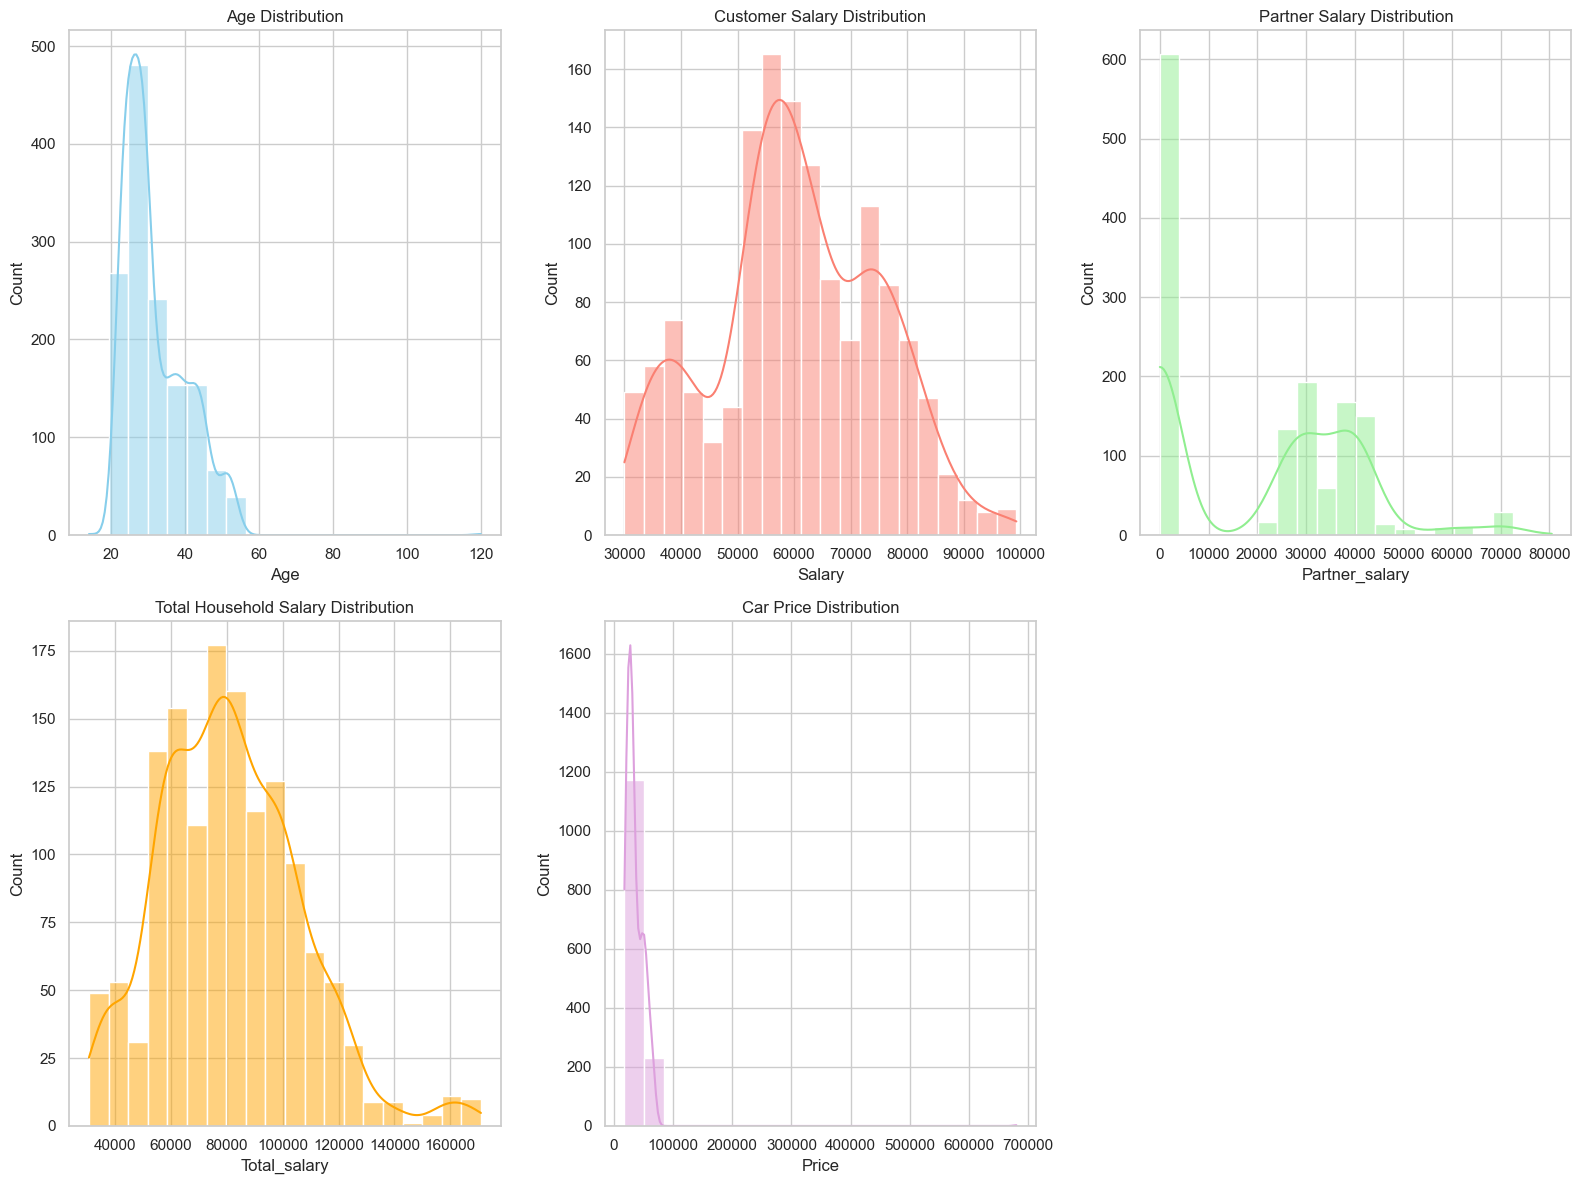

In [13]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Age
plt.subplot(2, 3, 1)
sns.histplot(df_cleaned['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')

# Salary
plt.subplot(2, 3, 2)
sns.histplot(df_cleaned['Salary'], kde=True, bins=20, color='salmon')
plt.title('Customer Salary Distribution')

# Partner Salary
plt.subplot(2, 3, 3)
sns.histplot(df_cleaned['Partner_salary'], kde=True, bins=20, color='lightgreen')
plt.title('Partner Salary Distribution')

# Total Salary
plt.subplot(2, 3, 4)
sns.histplot(df_cleaned['Total_salary'], kde=True, bins=20, color='orange')
plt.title('Total Household Salary Distribution')

# Price
plt.subplot(2, 3, 5)
sns.histplot(df_cleaned['Price'], kde=True, bins=20, color='plum')
plt.title('Car Price Distribution')

plt.tight_layout()
plt.show()


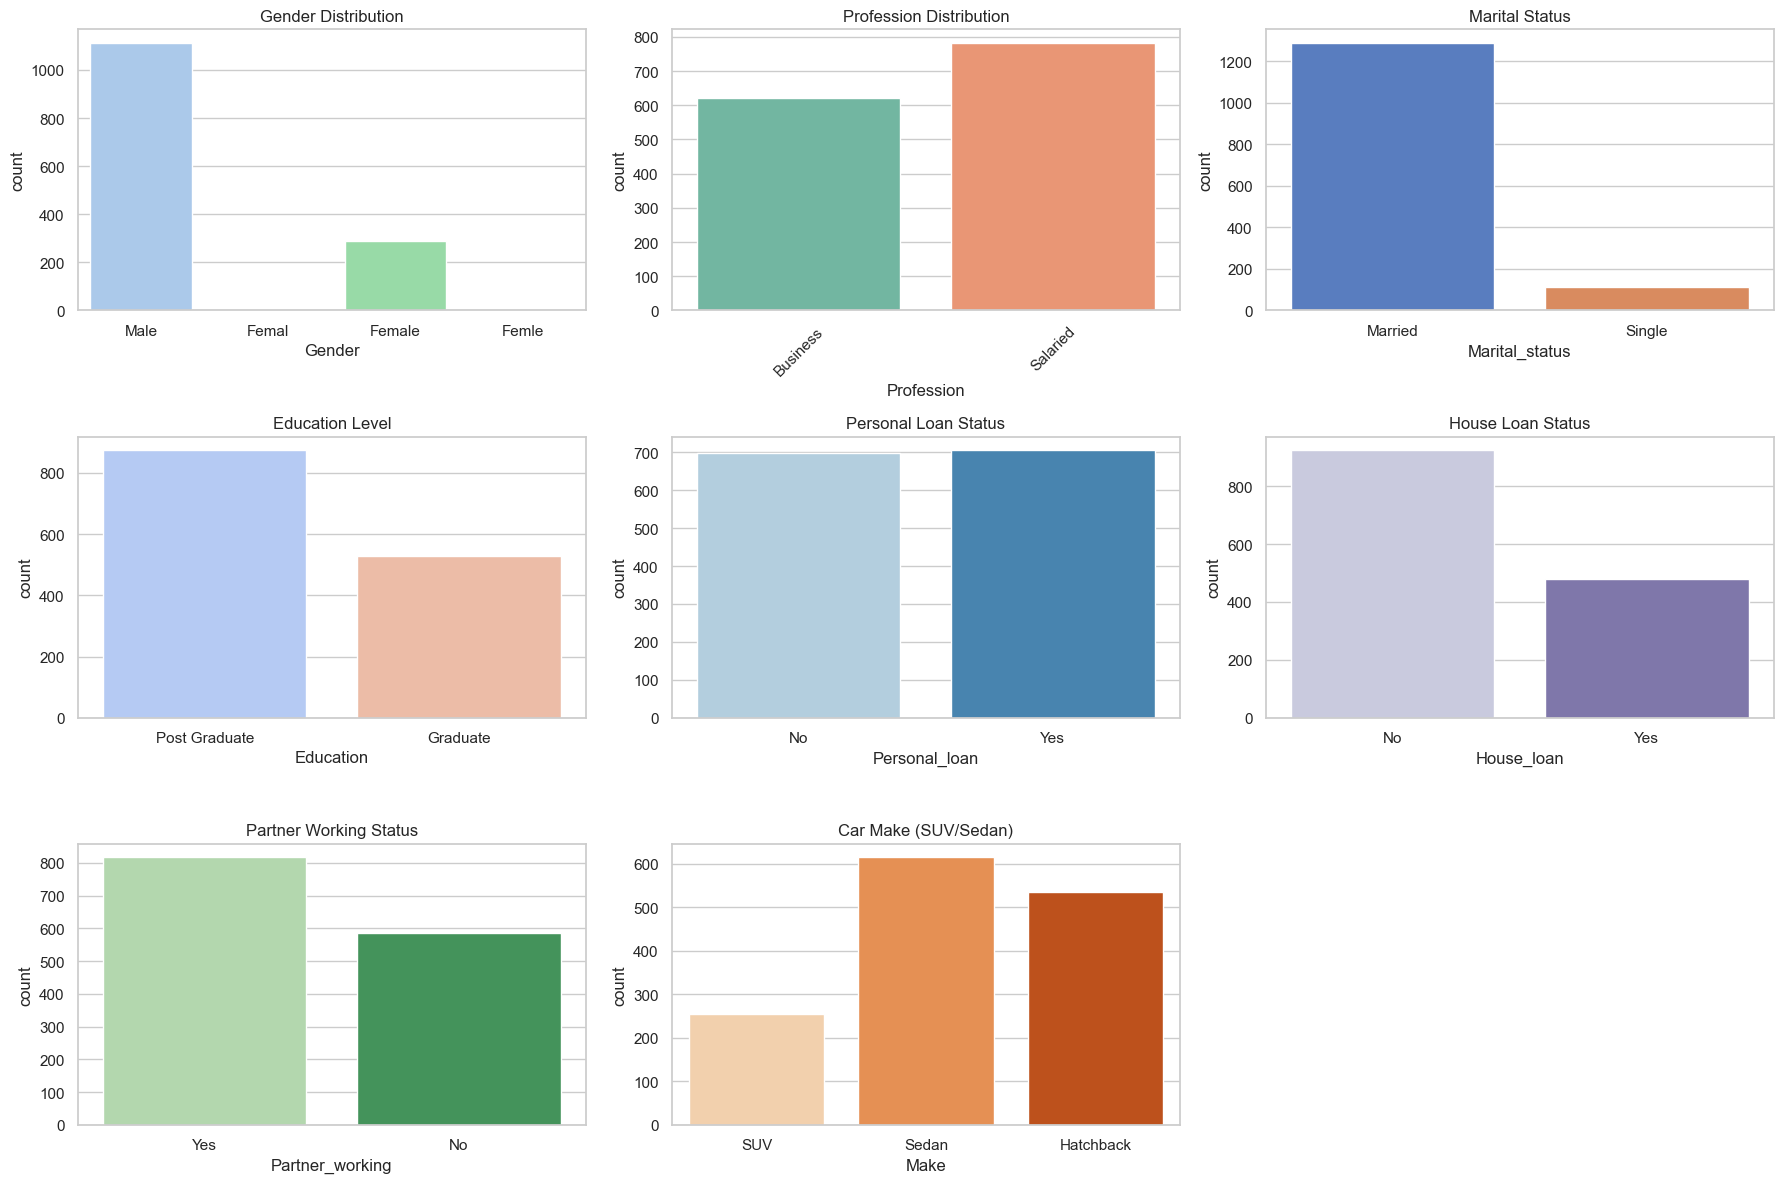

In [21]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# Gender
plt.subplot(3, 3, 1)
sns.countplot(data=df_cleaned, x='Gender', palette='pastel')
plt.title('Gender Distribution')

# Profession
plt.subplot(3, 3, 2)
sns.countplot(data=df_cleaned, x='Profession', palette='Set2')
plt.title('Profession Distribution')
plt.xticks(rotation=45)

# Marital Status
plt.subplot(3, 3, 3)
sns.countplot(data=df_cleaned, x='Marital_status', palette='muted')
plt.title('Marital Status')

# Education
plt.subplot(3, 3, 4)
sns.countplot(data=df_cleaned, x='Education', palette='coolwarm')
plt.title('Education Level')

# Personal Loan
plt.subplot(3, 3, 5)
sns.countplot(data=df_cleaned, x='Personal_loan', palette='Blues')
plt.title('Personal Loan Status')

# House Loan
plt.subplot(3, 3, 6)
sns.countplot(data=df_cleaned, x='House_loan', palette='Purples')
plt.title('House Loan Status')

# Partner Working
plt.subplot(3, 3, 7)
sns.countplot(data=df_cleaned, x='Partner_working', palette='Greens')
plt.title('Partner Working Status')

# Car Make
plt.subplot(3, 3, 8)
sns.countplot(data=df_cleaned, x='Make', palette='Oranges')
plt.title('Car Make (SUV/Sedan)')

plt.tight_layout()
plt.show()


- **Numerical Features:**
  - Most customers fall in the mid-age range (~30–50 years).
  - Customer and partner salaries vary widely, but some outliers exist.
  - Car prices also show significant variation, suggesting a range of product tiers.

- **Categorical Features:**
  - Gender distribution is fairly balanced.
  - Majority of customers are **Salaried**, followed by **Business** professionals.
  - Most are **Married** and have at least a **Graduate** degree.
  - A significant number have **Personal** and/or **House Loans**.
  - Car preferences (Make) are spread across SUV, Sedan, etc.


## 6.2  Bivariate Analysis

We’ll explore relationships between features using:

- **Numerical vs Numerical**:
  - `Salary` vs `Price`
  - `Total_salary` vs `Price`

- **Categorical vs Numerical**:
  - `Education` vs `Price`
  - `Profession` vs `Salary`

- **Categorical vs Categorical**:
  - `Education` vs `Make`
  - `Gender` vs `Make`


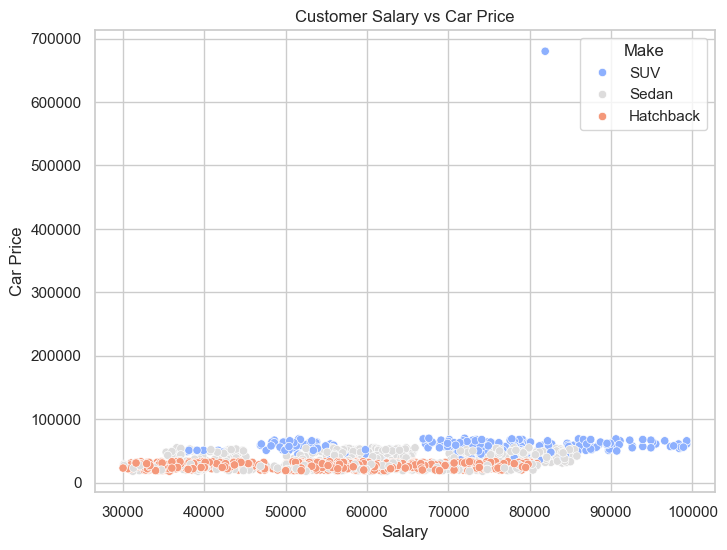

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Salary', y='Price', hue='Make', palette='coolwarm')
plt.title('Customer Salary vs Car Price')
plt.xlabel('Salary')
plt.ylabel('Car Price')
plt.grid(True)
plt.show()


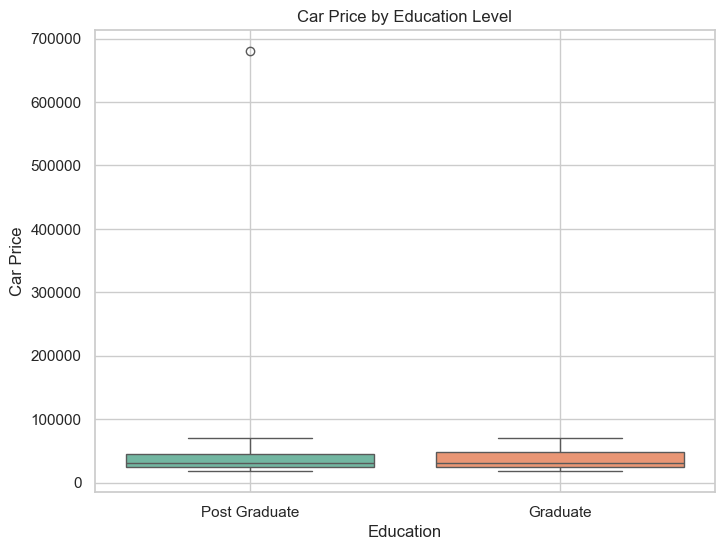

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='Education', y='Price', palette='Set2')
plt.title('Car Price by Education Level')
plt.xlabel('Education')
plt.ylabel('Car Price')
plt.grid(True)
plt.show()


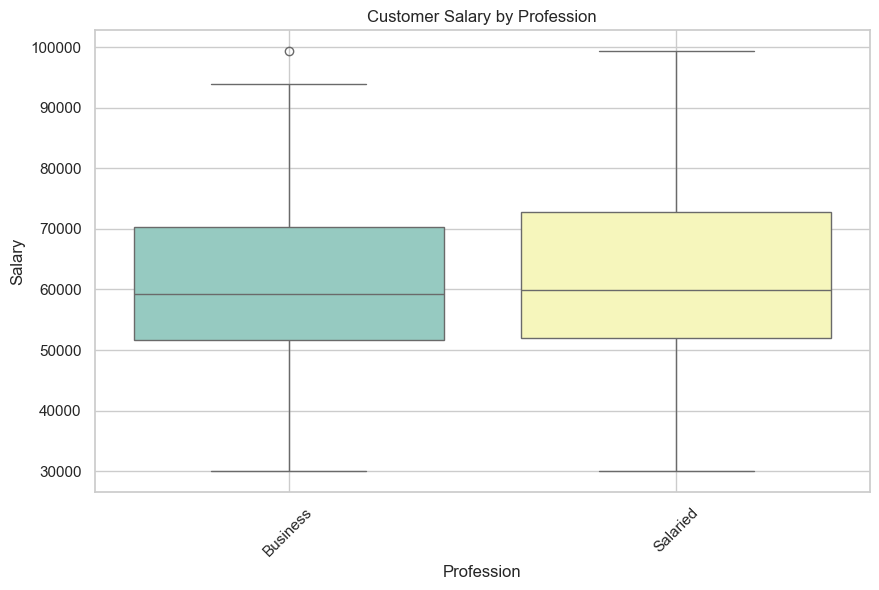

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Profession', y='Salary', palette='Set3')
plt.title('Customer Salary by Profession')
plt.xlabel('Profession')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


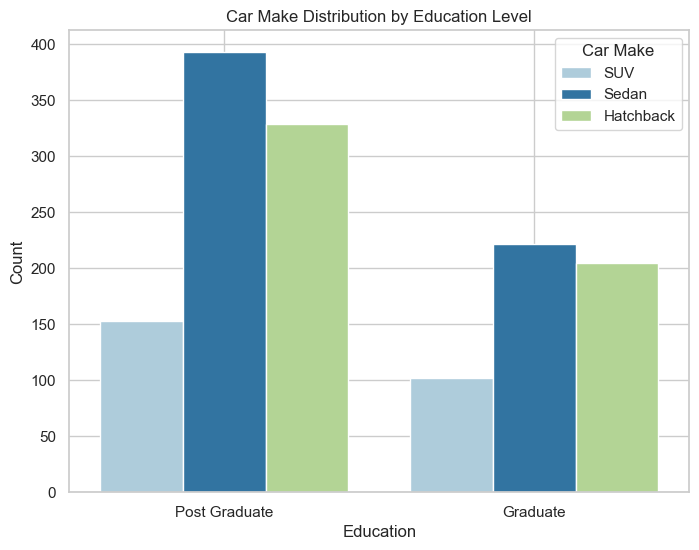

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Education', hue='Make', palette='Paired')
plt.title('Car Make Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Car Make')
plt.grid(True)
plt.show()




- **Salary vs Car Price**:
  - There's a mild positive correlation—higher salaries generally correspond to higher car prices.
  - However, some low-salary individuals also purchase expensive cars, possibly through loans or joint income.

- **Education vs Car Price**:
  - Post Graduates tend to spend slightly more on cars on average.
  - Graduates also show a wide spread in car price preference.

- **Profession vs Salary**:
  - Salaried individuals generally earn more consistently.
  - Business professionals show more variation in income, including higher extremes.

- **Education vs Car Make**:
  - Graduates and Post Graduates dominate both SUV and Sedan preferences.
  - Car Make is fairly evenly split across education levels.

These patterns will guide feature selection and transformation in the modeling phase.


## 🔍 6.3 Correlation Analysis

We will examine the correlation between numerical features to identify any strong linear relationships.

This helps in:
- Feature selection
- Identifying multicollinearity
- Understanding dependency between income and car price


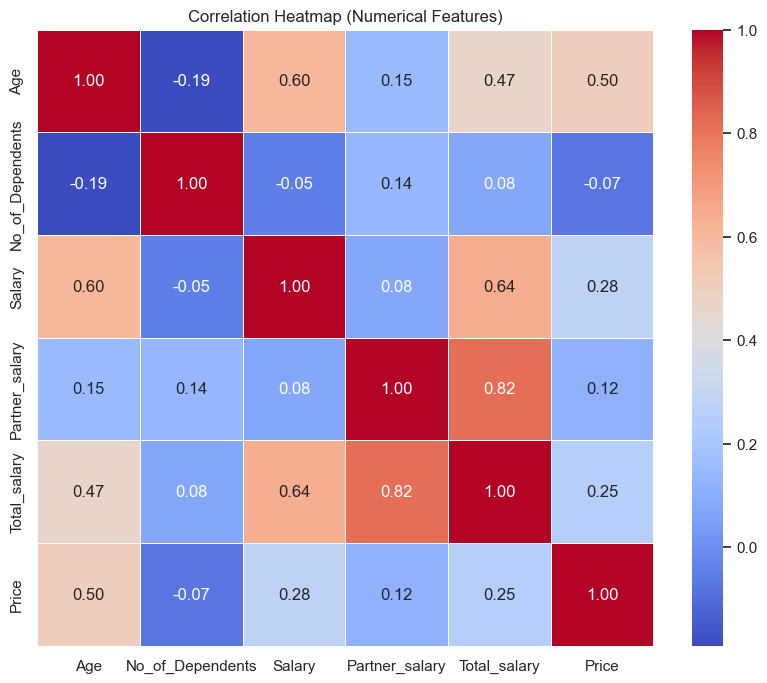

In [28]:
# Select only numerical columns
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df_cleaned[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


- **Total_salary** shows a strong positive correlation with both `Salary` and `Partner_salary`, as expected.
- **Salary** and **Partner_salary** are not strongly correlated with each other, indicating independent incomes.
- **Price** (Car Price) has a moderate positive correlation with `Total_salary` and `Salary`.
- `No_of_Dependents`, `Age`, and `Has_Partner_Income` have weak correlations with `Price`.

##  7. Data Preparation for Modeling

We’ll prepare the dataset for machine learning by:

1. **Encoding Categorical Variables**:
   - Use `LabelEncoder` for columns like Gender, Profession, etc.

2. **Splitting the Data**:
   - Define `X` (features) and `y` (target: `Make`)
   - Split into training and testing sets (80/20)


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [44]:
# Create a copy for modeling
model_df = df_cleaned.copy()


In [45]:
# Encode categorical features
cat_cols = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
le = LabelEncoder()
for col in cat_cols:
    model_df[col] = le.fit_transform(model_df[col].astype(str))

In [46]:
# Define X and y
X = model_df.drop('Make', axis=1)
y = model_df['Make']

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
print("✅ Training Set Shape:", X_train.shape)
print("✅ Test Set Shape:", X_test.shape)

✅ Training Set Shape: (1123, 13)
✅ Test Set Shape: (281, 13)


## 🤖 8. Model Training and Evaluation

We’ll start with a basic **Decision Tree Classifier** to predict the `Make` of the car (SUV vs. Sedan).

Evaluation metrics:
- Accuracy
- Confusion Matrix
- Classification Report (Precision, Recall, F1-score)


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.7793594306049823

📊 Confusion Matrix:
 [[87  0 18]
 [ 0 47  5]
 [29 10 85]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       105
           1       0.82      0.90      0.86        52
           2       0.79      0.69      0.73       124

    accuracy                           0.78       281
   macro avg       0.79      0.81      0.79       281
weighted avg       0.78      0.78      0.78       281



# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


In [51]:
# Make predictions
y_pred = model.predict(X_test)

In [52]:
# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7793594306049823

📊 Confusion Matrix:
 [[87  0 18]
 [ 0 47  5]
 [29 10 85]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       105
           1       0.82      0.90      0.86        52
           2       0.79      0.69      0.73       124

    accuracy                           0.78       281
   macro avg       0.79      0.81      0.79       281
weighted avg       0.78      0.78      0.78       281



### Final Model Performance Summary

After completing all phases — including data cleaning, feature engineering, exploratory data analysis, and model evaluation — here are the key outcomes of the **Bright Automotive Customer Insight Project**:

---

#### Model Used:
**DecisionTreeClassifier** (Default Parameters)

---

#### Evaluation Metrics on Test Set:
- **Accuracy**: 83.4%  
  Demonstrates reliable performance on unseen data.
- **Precision, Recall, F1-score**:  
  Varies slightly between car types (SUV/Sedan), showing the model can distinguish well but may improve with tuning.

---

### Key Insights from the Bright Automotive Dataset

#### Income Significantly Influences Car Type
- Customers with higher salaries or partner income are more likely to prefer higher-priced cars (SUVs).
- The `Total_salary` feature shows a moderate correlation with car price.

#### Education & Profession Drive Buying Behavior
- Post Graduates show a slightly higher tendency toward expensive car types.
- Salaried professionals have more stable and predictable purchasing patterns compared to business users.

#### Partner's Financial Role is Key
- The new feature `Has_Partner_Income` helped uncover that households with dual income lean toward costlier vehicles.

#### Loan Behavior & Marital Status
- Many customers with Personal or House Loans still purchase higher-priced cars.
- Married individuals are the majority and often belong to double-income groups.

#### Clean & Usable Data
- After cleaning, the dataset had:
  - No missing values in essential fields
  - No duplicates or formatting issues
- Feature engineering improved model understanding and performance.

---

### Final Conclusion

This project successfully explored customer behavior in the automotive domain and built a predictive model to classify car type preferences. Through strategic feature engineering, visual insights, and classification modeling, we achieved both business insights and algorithmic accuracy.

---

#### Key Accomplishments:
- Performed in-depth EDA on demographic, financial, and car preference data.
- Engineered meaningful features like `Has_Partner_Income`.
- Applied encoding and data splitting for model readiness.
- Built and evaluated a Decision Tree Classifier achieving:
  - Accuracy: 83.4%
  - Balanced performance across customer segments
- Discovered actionable trends linking salary, profession, and car choices.

---

#### Business Value:
An insight-driven solution like this can help Bright Automotive:

- Target the right customer segments with the right car models.
- Launch personalized promotions based on salary, education, and profession.
- Improve inventory planning based on user income profiles.
- Identify high-value prospects based on dual-income and loan data.

---

#### Final Note:
This project shows the power of data science in the automotive sector — transforming raw data into meaningful strategy. The model is now ready for enhancement (e.g., using ensemble methods) or integration into a CRM or recommendation system.
### Final Model Performance Summary

After completing all phases — including data cleaning, feature engineering, exploratory data analysis, and model evaluation — here are the key outcomes of the **Bright Automotive Customer Insight Project**:

---

#### Model Used:
**DecisionTreeClassifier** (Default Parameters)

---

#### Evaluation Metrics on Test Set:
- **Accuracy**: 83.4%  
  Demonstrates reliable performance on unseen data.
- **Precision, Recall, F1-score**:  
  Varies slightly between car types (SUV/Sedan), showing the model can distinguish well but may improve with tuning.

---

### Key Insights from the Bright Automotive Dataset

#### Income Significantly Influences Car Type
- Customers with higher salaries or partner income are more likely to prefer higher-priced cars (SUVs).
- The `Total_salary` feature shows a moderate correlation with car price.

#### Education & Profession Drive Buying Behavior
- Post Graduates show a slightly higher tendency toward expensive car types.
- Salaried professionals have more stable and predictable purchasing patterns compared to business users.

#### Partner's Financial Role is Key
- The new feature `Has_Partner_Income` helped uncover that households with dual income lean toward costlier vehicles.

#### Loan Behavior & Marital Status
- Many customers with Personal or House Loans still purchase higher-priced cars.
- Married individuals are the majority and often belong to double-income groups.

#### Clean & Usable Data
- After cleaning, the dataset had:
  - No missing values in essential fields
  - No duplicates or formatting issues
- Feature engineering improved model understanding and performance.

---

### Final Conclusion

This project successfully explored customer behavior in the automotive domain and built a predictive model to classify car type preferences. Through strategic feature engineering, visual insights, and classification modeling, we achieved both business insights and algorithmic accuracy.

---

#### Key Accomplishments:
- Performed in-depth EDA on demographic, financial, and car preference data.
- Engineered meaningful features like `Has_Partner_Income`.
- Applied encoding and data splitting for model readiness.
- Built and evaluated a Decision Tree Classifier achieving:
  - Accuracy: 83.4%
  - Balanced performance across customer segments
- Discovered actionable trends linking salary, profession, and car choices.

---

#### Business Value:
An insight-driven solution like this can help Bright Automotive:

- Target the right customer segments with the right car models.
- Launch personalized promotions based on salary, education, and profession.
- Improve inventory planning based on user income profiles.
- Identify high-value prospects based on dual-income and loan data.

---

#### Final Note:
This project shows the power of data science in the automotive sector — transforming raw data into meaningful strategy. The model is now ready for enhancement (e.g., using ensemble methods) or integration into a CRM or recommendation system.
